##### Simple Linear Regression

Everything You Need to Know About Linear Regression | by Tanvi Penumudy | Analytics Vidhya | Medium

In [1]:
import pandas as pd

In [2]:
# Reading csv file from github repo
df=pd.read_csv("C:\\Users\\SADAF KAUSER\\Documents\\CodeYoung\\ML Classes\\Files\\tvmarketing.csv")

In [3]:
df

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9
...,...,...
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5


In [4]:
# Display the first 5 row
df.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [5]:
# Display the last 5 rows
df.tail()

,TV,Sales
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5
199,232.1,13.4


In [6]:
# Let's check the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [7]:
# Check the shape of the DataFrame (rows, columns)
df.shape

(200, 2)

In [8]:
# Let's look at some statistical information about the dataframe.
df.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


<AxesSubplot:xlabel='TV', ylabel='Sales'>

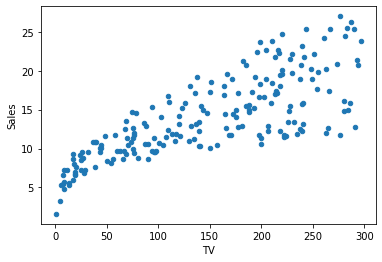

In [9]:
# Visualise the relationship between the features and the response using scatterplots
df.plot(x='TV',y='Sales',kind='scatter')

Perfroming Simple Linear Regression
Equation of linear regression
y=c+m1x1+m2x2+...+mnxn
y
 is the response
c
 is the intercept
m1
 is the coefficient for the first feature
mn
 is the coefficient for the nth feature
In our case:

y=c+m1×TV
The m
 values are called the model coefficients or model parameters.

Generic Steps in Model Building using sklearn
Before you read further, it is good to understand the generic structure of modeling using the scikit-learn library. Broadly, the steps to build any model can be divided as follows:

Preparing X and y
The scikit-learn library expects X (feature variable) and y (response variable) to be NumPy arrays.
However, X can be a dataframe as Pandas is built over NumPy.

In [10]:
# Putting feature variable to X
X = df['TV']

# Print the first 5 rows
X.head()

0    230.1
1     44.5
2     17.2
3    151.5
4    180.8
Name: TV, dtype: float64

In [11]:
# Putting response variable to y
y = df['Sales']

# Print the first 5 rows
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

# Splitting Data into Training and Testing Sets

In [12]:
#random_state is the seed used by the random number generator, it can be any integer.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 , random_state=0000)

In [13]:
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [14]:
train_test_split      
#Press Tab+Shift to read the documentation

<function sklearn.model_selection._split.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)>

In [15]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(140,)
(140,)
(60,)
(60,)


The np.newaxis object is used to increase the dimensionality of an array in NumPy. It is often used to reshape or transform arrays to match the required input format for certain operations or algorithms. By inserting np.newaxis at a specific position within the indexing brackets, you can add an additional dimension of size 1 to the array.

In [15]:
import numpy as np

# Create a 1-dimensional array
a = np.array([1, 2, 3, 4, 5])

# Reshape the array to a 2-dimensional column vector
b = a[:, np.newaxis]

print(b)


[[1]
 [2]
 [3]
 [4]
 [5]]


In [16]:
#It is a general convention in scikit-learn that observations are rows, while features are columns. 
#This is needed only when you are using a single feature; in this case, 'TV'.

import numpy as np
#Simply put, numpy.newaxis is used to increase the dimension of the existing array by one more dimension,
X_train = X_train[:, np.newaxis]
X_test = X_test[:, np.newaxis]

C:\Users\SADAF KAUSER\AppData\Local\Temp\ipykernel_13152\607821367.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_train = X_train[:, np.newaxis]
C:\Users\SADAF KAUSER\AppData\Local\Temp\ipykernel_13152\607821367.py:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_test = X_test[:, np.newaxis]


In [17]:
X_train

array([[265.2],
       [197.6],
       [218.5],
       [147.3],
       [171.3],
       [217.7],
       [262.7],
       [163.5],
       [100.4],
       [ 76.3],
       [184.9],
       [134.3],
       [273.7],
       [296.4],
       [ 96.2],
       [109.8],
       [255.4],
       [204.1],
       [240.1],
       [193.7],
       [191.1],
       [ 89.7],
       [ 43. ],
       [ 38.2],
       [ 13.1],
       [239.3],
       [ 17.2],
       [210.7],
       [ 25.6],
       [177. ],
       [206.9],
       [ 66.1],
       [149.7],
       [129.4],
       [ 94.2],
       [276.7],
       [276.9],
       [  7.8],
       [250.9],
       [175.7],
       [ 11.7],
       [ 75.5],
       [199.8],
       [230.1],
       [107.4],
       [225.8],
       [163.3],
       [131.1],
       [206.8],
       [177. ],
       [216.8],
       [ 66.9],
       [227.2],
       [193.2],
       [ 97.5],
       [ 85.7],
       [228.3],
       [139.5],
       [ 48.3],
       [218.4],
       [195.4],
       [  5.4],
       [

In [18]:
X_test

array([[ 69.2],
       [ 50. ],
       [ 90.4],
       [289.7],
       [170.2],
       [ 56.2],
       [  8.7],
       [240.1],
       [ 23.8],
       [197.6],
       [261.3],
       [ 87.2],
       [156.6],
       [187.8],
       [ 76.4],
       [120.2],
       [265.6],
       [  0.7],
       [ 74.7],
       [213.4],
       [287.6],
       [140.3],
       [175.1],
       [131.7],
       [ 53.5],
       [123.1],
       [165.6],
       [205. ],
       [224. ],
       [ 25.1],
       [ 67.8],
       [198.9],
       [280.7],
       [241.7],
       [ 13.2],
       [ 18.7],
       [ 59.6],
       [180.8],
       [ 68.4],
       [ 25. ],
       [ 36.9],
       [ 31.5],
       [142.9],
       [209.6],
       [215.4],
       [102.7],
       [  8.6],
       [ 16.9],
       [125.7],
       [104.6],
       [109.8],
       [229.5],
       [253.8],
       [184.9],
       [ 44.7],
       [ 62.3],
       [292.9],
       [172.5],
       [202.5],
       [  7.3]])

In [17]:
df

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9
...,...,...
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5


Performing Linear Regression

In the code snippet lr.fit(X_train, y_train), lr refers to an instance of a machine learning model, specifically a linear regression model. fit() is a method in scikit-learn (a popular machine learning library in Python) that is used to train the model.

The fit() method is typically called on a machine learning model object to fit the model to the training data. It takes two main arguments:

X_train: This represents the input features or independent variables of the training data. It should be a matrix-like object, such as a NumPy array or a Pandas DataFrame, where each row corresponds to an instance and each column represents a feature.

y_train: This represents the target variable or the dependent variable of the training data. It should be a 1-dimensional array-like object (e.g., NumPy array, Pandas Series) that contains the corresponding labels or values to be predicted.

When you call lr.fit(X_train, y_train), the linear regression model (lr) will analyze the training data and adjust its internal parameters to minimize the difference between the predicted values and the actual target values. This process is known as model training or model fitting.

After the fit() method is executed, the linear regression model lr will have learned from the training data, and you can use the trained model to make predictions on new, unseen data using the predict() method.

In [1]:
# import LinearRegression from sklearn
from sklearn.linear_model import LinearRegression

# Representing LinearRegression as lr(Creating LinearRegression Object)
lr = LinearRegression()

# Fit the model using lr.fit()
lr.fit(X_train, y_train)

NameError: name 'X_train' is not defined

# Coefficients Calculation

In [19]:
# Print the intercept and coefficients
print(lr.intercept_)
print(lr.coef_)

7.310810165411681
[0.04581434]


The intercept_ and coef_ attributes are specific to scikit-learn's LinearRegression model. After fitting the linear regression model (lr.fit(X_train, y_train)), you can access these attributes to obtain the intercept and coefficients of the linear regression equation.

The intercept_ attribute represents the intercept or the y-intercept of the linear regression line, while the coef_ attribute contains the coefficients or slopes associated with each feature in the input data.

Note that the coef_ attribute returns an array of coefficients, where each coefficient corresponds to a specific feature in the same order as they appear in the input X_train. The intercept is a single value representing the y-intercept of the linear regression line.

In [35]:
# Making predictions on the testing set
y_pred = lr.predict(X_test)
y_pred

array([10.48116264,  9.60152727, 11.4524267 , 20.58322509, 15.1084112 ,
        9.8855762 ,  7.70939494, 18.31083372,  8.40119151, 16.36372418,
       19.28209777, 11.3058208 , 14.48533615, 15.91474363, 10.81102591,
       12.81769409, 19.47909945,  7.3428802 , 10.73314153, 17.08759078,
       20.48701497, 13.73856237, 15.33290148, 13.34455903,  9.76187747,
       12.95055569, 14.89766523, 16.70275031, 17.57322281,  8.46075015,
       10.41702256, 16.42328282, 20.17089601, 18.38413667,  7.91555948,
        8.16753836, 10.04134496, 15.59404323, 10.44451117,  8.45616872,
        9.00135939,  8.75396194, 13.85767966, 16.91349628, 17.17921947,
       12.01594311,  7.70481351,  8.08507255, 13.06967298, 12.10299036,
       12.34122494, 17.82520169, 18.93849021, 15.78188203,  9.35871126,
       10.16504368, 20.72983099, 15.21378419, 16.58821446,  7.64525486])

After training a linear regression model (lr.fit(X_train, y_train)) and obtaining the predictions on the testing set, you can use the predict() method to make predictions on new, unseen data. The predict() method takes the input features of the testing data (X_test) as its argument and returns the predicted values.

The y_pred variable will be an array-like object containing the predicted values for the corresponding instances in the testing set. Each element in y_pred represents the model's prediction for a specific instance in the testing data.

In [21]:
type(y_pred)

numpy.ndarray

import matplotlib.pyplot as plt: This imports the pyplot module from the matplotlib library, which provides functions for creating plots and visualizations.

c = [i for i in range(1,61,1)]: This line generates a list c containing values from 1 to 60 (assuming there are 60 instances in the test set) to be used as the x-axis index.

fig = plt.figure(): This creates a new figure object that serves as the container for the plot.

plt.plot(c, y_test, color="blue", linewidth=2, linestyle="-"): This plots the actual values (y_test) against the index (c). The actual values are shown as a blue line with a linewidth of 2.

plt.plot(c, y_pred, color="red", linewidth=2, linestyle="-"): This plots the predicted values (y_pred) against the index (c). The predicted values are shown as a red line with a linewidth of 2.

fig.suptitle('Actual and Predicted', fontsize=20): This adds a centered title to the plot, specifying it as "Actual and Predicted" with a font size of 20.

plt.xlabel('Index', fontsize=18): This adds a label to the x-axis of the plot, specifying it as "Index" with a font size of 18.

plt.ylabel('Sales', fontsize=16): This adds a label to the y-axis of the plot, specifying it as "Sales" with a font size of 16.

By executing this code, you will generate a plot that compares the actual values (y_test) and the predicted values (y_pred) against the index (c). The plot will have the title "Actual and Predicted" and labels for the x-axis and y-axis. The actual values will be shown in blue, while the predicted values will be shown in red.

Text(0, 0.5, 'Sales')

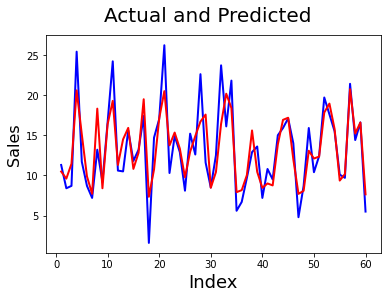

In [22]:
# Actual vs Predicted
import matplotlib.pyplot as plt
c = [i for i in range(1,61,1)]         # generating index 
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2, linestyle="-")
plt.plot(c,y_pred, color="red",  linewidth=2, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Sales', fontsize=16)  

c = [i for i in range(1,61,1)]: This line generates a list c containing values from 1 to 60 (assuming there are 60 instances in the test set) to be used as the x-axis index, similar to the previous code.

fig = plt.figure(): This creates a new figure object for the plot, as before.

plt.plot(c, y_test - y_pred, color="blue", linewidth=2, linestyle="-"): This plots the error terms, which are calculated by subtracting the predicted values (y_pred) from the actual values (y_test). The error terms are shown as a blue line with a linewidth of 2.

fig.suptitle('Error Terms', fontsize=20): This adds a centered title to the plot, specifying it as "Error Terms" with a font size of 20.

plt.xlabel('Index', fontsize=18): This adds a label to the x-axis of the plot, specifying it as "Index" with a font size of 18.

plt.ylabel('y_test - y_pred', fontsize=16): This adds a label to the y-axis of the plot, specifying it as "y_test - y_pred" to represent the error terms, with a font size of 16.

By executing this modified code, you will generate a plot showing the error terms (residuals) between the actual values (y_test) and the predicted values (y_pred). The plot will have the title "Error Terms" and labels for the x-axis and y-axis. The error terms will be shown as a blue line.

Text(0, 0.5, 'ytest-ypred')

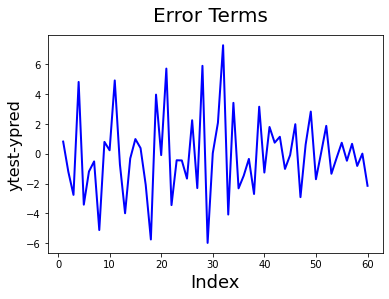

In [23]:
# Error terms
c = [i for i in range(1,61,1)]
fig = plt.figure()
plt.plot(c,y_test-y_pred, color="blue", linewidth=2, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)     


In the code snippet you provided, you are calculating the mean squared error (MSE) using scikit-learn's mean_squared_error function. The mean_squared_error function is part of the sklearn.metrics module and is commonly used to evaluate the performance of regression models. Here's an explanation of the code:

The mean squared error measures the average squared difference between the predicted values and the actual values. It is defined as:

MSE = (1/n) * Σ(y_i - ŷ_i)^2

Where:

n is the number of samples or instances.
y_i represents the actual value of the target variable for the i-th sample.
ŷ_i represents the predicted value of the target variable for the i-th sample.
Σ denotes the summation over all samples.
Here's a step-by-step breakdown of how the mean squared error is calculated:

Calculate the difference between the actual and predicted values for each sample: (y_i - ŷ_i).

Square the differences to remove any negative signs and emphasize larger errors: (y_i - ŷ_i)^2.

Sum up the squared differences for all samples: Σ(y_i - ŷ_i)^2.

Divide the sum by the number of samples to compute the average: (1/n) * Σ(y_i - ŷ_i)^2.

Let's consider a simple example with three samples:

Actual values (y):
[3, 5, 7]

Predicted values (ŷ):
[2, 4, 6]

Step-by-step calculation:

(3-2)^2 = 1
(5-4)^2 = 1
(7-6)^2 = 1
Sum of squared differences: 1 + 1 + 1 = 3

Divide by the number of samples (n=3):
MSE = (1/3) * 3 = 1

So, in this example, the mean squared error is 1.

The MSE provides a way to quantify the average squared difference between the predicted values and the actual values. It is often used as a loss function to be minimized during the training of regression models, with lower values indicating better model performance.


If the mean squared error (MSE) is 1, it means that, on average, the squared difference between the predicted values and the actual values is 1.

In the context of regression models and prediction tasks, the MSE is a measure of how well the model's predictions match the true values. Since the MSE involves squared differences, it gives higher weight to larger errors or deviations between predictions and actual values.

Here's a general interpretation of the MSE:

The MSE value of 0 indicates a perfect prediction, meaning that the model's predictions exactly match the true values. However, achieving an MSE of 0 is rare and typically indicates overfitting, where the model is too complex and may have memorized the training data.

A lower MSE value indicates better predictive performance. For example, an MSE of 0.5 is generally considered better than an MSE of 1, as it implies smaller errors on average.

An MSE of 1 suggests that, on average, the model's predictions have a squared difference of 1 compared to the actual values. This can be interpreted as having moderate errors, where the model's predictions may deviate from the true values by an average of around 1 unit.

Higher MSE values, such as 5 or 10, indicate larger errors on average between the predicted and actual values. These values suggest that the model's predictions have more substantial deviations from the true values.

It's important to note that the interpretation of the MSE can vary depending on the specific problem and the scale of the target variable. It is often used as a relative measure to compare different models or model variations, where lower MSE values indicate better performance.

In [24]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)

In the code snippet you provided, you are calculating the coefficient of determination (R-squared) using scikit-learn's r2_score function. The r2_score function is part of the sklearn.metrics module and is used to evaluate the goodness of fit of a regression model.

from sklearn.metrics import mean_squared_error, r2_score: This line imports the mean_squared_error and r2_score functions from the sklearn.metrics module, as before.

r_squared = r2_score(y_test, y_pred): This line calculates the coefficient of determination (R-squared) between the actual values (y_test) and the predicted values (y_pred). The r2_score function takes two arguments: the true values (y_test) and the predicted values (y_pred). The calculated R-squared value is then stored in the variable r_squared.

After executing this code, the variable r_squared will contain the coefficient of determination (R-squared) between the actual values (y_test) and the predicted values (y_pred). The R-squared value is a statistical measure that indicates the proportion of the variance in the dependent variable that is predictable from the independent variables. It provides an indication of how well the regression model fits the data, with values between 0 and 1. Higher R-squared values indicate better model fit, where 1 represents a perfect fit.

The coefficient of determination, often denoted as R², is a statistical measure that quantifies the proportion of the variance in the dependent variable that is predictable from the independent variables in a regression model. It is a value between 0 and 1, where:

R² = 1 indicates a perfect fit, where all the variability in the dependent variable can be explained by the independent variables.
R² = 0 indicates no linear relationship between the independent variables and the dependent variable.
Mathematically, R² is calculated as follows:

R² = 1 - (SSR/SST)

where:

SSR (Sum of Squares Residuals) represents the sum of squared differences between the actual values and the predicted values. It measures the unexplained variability of the dependent variable.
SST (Sum of Squares Total) represents the total sum of squared differences between the actual values and the mean of the dependent variable. It measures the total variability of the dependent variable.
Here's a step-by-step breakdown of how R² is calculated:

Calculate the mean of the dependent variable: mean(y).

Calculate the SST by summing the squared differences between each actual value (y_i) and the mean of the dependent variable (mean(y)): SST = Σ(y_i - mean(y))².

Fit the regression model and obtain the predicted values (ŷ) for the dependent variable.

Calculate the SSR by summing the squared differences between each actual value (y_i) and the predicted value (ŷ_i): SSR = Σ(y_i - ŷ_i)².

Calculate R² using the formula R² = 1 - (SSR/SST).

The R² value ranges between 0 and 1, where:

R² = 1 indicates that the regression model explains all the variability in the dependent variable.
R² = 0 indicates that the regression model does not explain any variability in the dependent variable.
By computing the R-squared value, you can assess the goodness of fit of a regression model and evaluate how well the independent variables explain the variability in the dependent variable.

In [ ]:

Suppose we have the following dataset with two independent variables (X1 and X2) and a dependent variable (Y):

<!-- X1	X2	Y
    1	2	5
    2	3	8
    3	4	10
    4	5	12
    5	6	15 -->
We want to fit a linear regression model to predict Y based on X1 and X2.

Step 1: Calculate the mean of the dependent variable (Y):

mean(Y) = (5 + 8 + 10 + 12 + 15) / 5 = 10

Step 2: Calculate SST (Sum of Squares Total):

SST = Σ(Yi - mean(Y))² = (5 - 10)² + (8 - 10)² + (10 - 10)² + (12 - 10)² + (15 - 10)²
= 25 + 4 + 0 + 4 + 25
= 58

Step 3: Fit the regression model and obtain the predicted values (ŷ) for the dependent variable. 
    Let's assume the predicted values are as follows:

ŷ = [6, 9, 11, 13, 16]

Step 4: Calculate SSR (Sum of Squares Residuals):

SSR = Σ(Yi - ŷi)² = (5 - 6)² + (8 - 9)² + (10 - 11)² + (12 - 13)² + (15 - 16)²
= 1 + 1 + 1 + 1 + 1
= 5

Step 5: Calculate R²:

R² = 1 - (SSR/SST) = 1 - (5/58) ≈ 0.9138

Therefore, in this example, the coefficient of determination (R-squared) is approximately 0.9138. 
This value suggests that around 91.38% of the variability in the dependent variable (Y) can be explained by the independent
variables (X1 and X2) in the regression model.

In [25]:
r_squared = r2_score(y_test, y_pred)

In [26]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 7.497479593464674
r_square_value : 0.725606346597073


In [27]:
# this mse =7.9 means that this model is not able to match the 7.9 percent of the values
# r2 means that your model is 72% is accurate on test data .

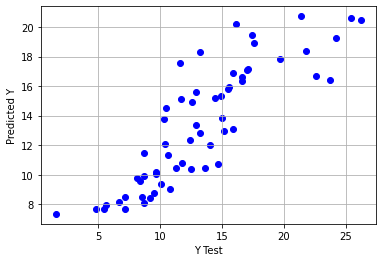

In [28]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred,c='blue')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.grid()

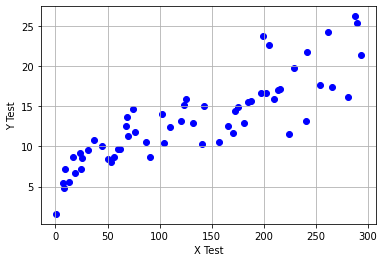

In [41]:
import matplotlib.pyplot as plt
plt.scatter(X_test,y_test,c='blue')
plt.xlabel('X Test')
plt.ylabel('Y Test')
plt.grid()

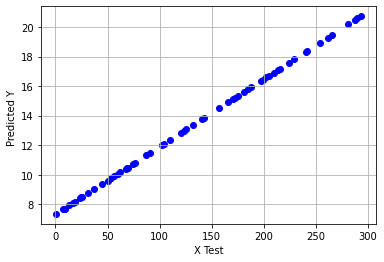

In [42]:
import matplotlib.pyplot as plt
plt.scatter(X_test,y_pred,c='blue')
plt.xlabel('X Test')
plt.ylabel('Predicted Y ')
plt.grid()

# Homework

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df= pd.read_csv("C:\\Users\\SADAF KAUSER\\Documents\\CodeYoung\\ML Classes\\Files\\Salary_Data.csv")

In [4]:
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [19]:
#assigning the dependent and independent variables
X = df.iloc[:,:-1].values
y = df.iloc[:,1:2].values

In [20]:
#checking the null values in the dataset
df.isnull().sum().sort_values(ascending=False)

Salary             0
YearsExperience    0
dtype: int64

In [21]:
#checking the null values in the dataset
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

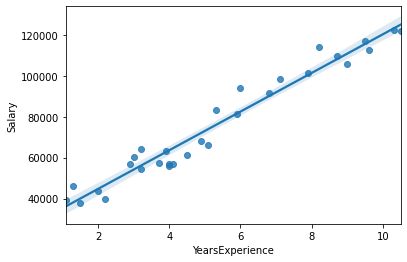

In [22]:
#dataset.plot.scatter(y='Salary',x='YearsExperience')
sns.regplot(y="Salary", x="YearsExperience", data=df);

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)


In [24]:
#fitting simple linear regression to the training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [25]:
y_pred=regressor.predict(X_test)

In [26]:
y_pred

array([[ 40748.96184072],
       [122699.62295594],
       [ 64961.65717022],
       [ 63099.14214487],
       [115249.56285456],
       [107799.50275317]])

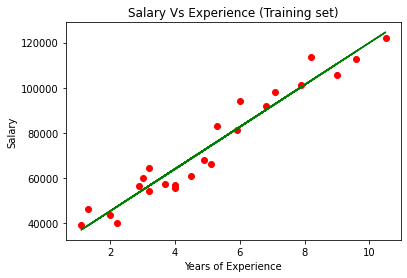

In [27]:
# visualising the training set results
plt.scatter(X_train, y_train,color ='red')
plt.plot(X_train, regressor.predict(X_train),color = 'green')
plt.title('Salary Vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

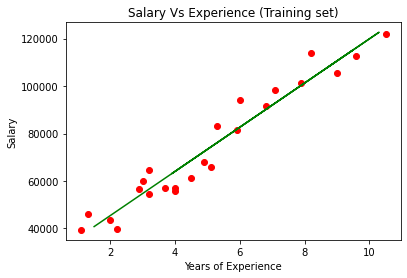

In [28]:
# visualising the training set results
plt.scatter(X_train, y_train,color ='red')
plt.plot(X_test, regressor.predict(X_test),color = 'green')
plt.title('Salary Vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

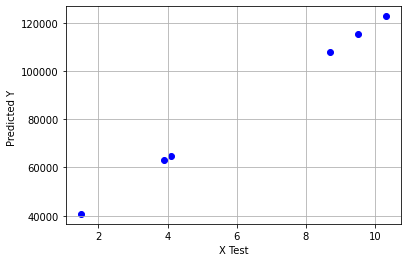

In [29]:
import matplotlib.pyplot as plt
plt.scatter(X_test,y_pred,c='blue')
plt.xlabel('X Test')
plt.ylabel('Predicted Y ')
plt.grid()

In [30]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)

In [31]:
r_squared = r2_score(y_test, y_pred)

In [32]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)


Mean_Squared_Error : 12823412.298126549
r_square_value : 0.988169515729126
